# Proyecto #1

In [1]:
import numpy as np
import seaborn as sn
import math
import matplotlib.pylab as plt
import pandas as pd
import matplotlib.pyplot as plot
from sklearn import linear_model

In [2]:
datos = np.load('proyecto_training_data.npy')

# Conteo de Datos

In [7]:
#Numero de datos
print(len(datos))
variables = ['SalesPrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

1460


In [8]:
# Datos de Entrenamiento
trainData = datos[:1168]
# Numero de datos de Entrenamiento
print(len(trainData))

1168


In [9]:
#Datos de Validacion
valData = datos[1168:]
#Numero de datos de Validacion
print(len(valData))

292


In [10]:
mediaTrainData = np.nanmean(trainData, axis = 0)
for i in range(0, 6):
    print('Media ' + variables[i] + ' :   ' + str(mediaTrainData[i]))

Media SalesPrice :   180590.27739726027
Media OverallQual :   6.101027397260274
Media 1stFlrSF :   1156.3236301369864
Media TotRmsAbvGrd :   6.4854452054794525
Media YearBuilt :   1971.451198630137
Media LotFrontage :   69.94698544698545


In [11]:
maxTrainData = np.nanmax(trainData, axis = 0)
for i in range(0, 6):
    print('Max ' + variables[i] + ' :   ' + str(maxTrainData[i]))

Max SalesPrice :   755000.0
Max OverallQual :   10.0
Max 1stFlrSF :   3228.0
Max TotRmsAbvGrd :   14.0
Max YearBuilt :   2010.0
Max LotFrontage :   313.0


In [12]:
minTrainData = np.nanmin(trainData, axis = 0)
for i in range(0, 6):
    print('Min ' + variables[i] + ' :   ' + str(minTrainData[i]))

Min SalesPrice :   34900.0
Min OverallQual :   1.0
Min 1stFlrSF :   334.0
Min TotRmsAbvGrd :   2.0
Min YearBuilt :   1875.0
Min LotFrontage :   21.0


In [13]:
rangos = [];
for i in range(0, 6):
    rangePtP = maxTrainData[i]-minTrainData[i]
    rangos.append(rangePtP)
    print('Range ' + variables[i] + ' :   ' + str(rangePtP))

Range SalesPrice :   720100.0
Range OverallQual :   9.0
Range 1stFlrSF :   2894.0
Range TotRmsAbvGrd :   12.0
Range YearBuilt :   135.0
Range LotFrontage :   292.0


In [14]:
stdTrainData = np.nanstd(trainData, axis = 0)
for i in range(0, 6):
    print('Desviacion Standard ' + variables[i] + ' :   ' + str(stdTrainData[i]))

Desviacion Standard SalesPrice :   78781.95108033362
Desviacion Standard OverallQual :   1.377435193240741
Desviacion Standard 1stFlrSF :   373.620331503586
Desviacion Standard TotRmsAbvGrd :   1.6084517167387253
Desviacion Standard YearBuilt :   29.93888206867768
Desviacion Standard LotFrontage :   23.4659548199304


Text(0.5, 0, 'SalesPrice')

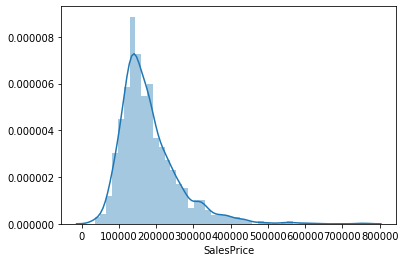

In [15]:
sn.distplot(trainData[:,0:1],hist=True)
plt.xlabel(variables[0])

Text(0.5, 0, 'OverallQual')

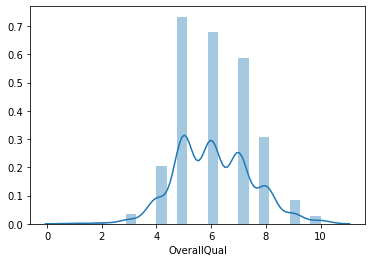

In [16]:
sn.distplot(trainData[:,1:2],hist=True)
plt.xlabel(variables[1])

Text(0.5, 0, '1stFlrSF')

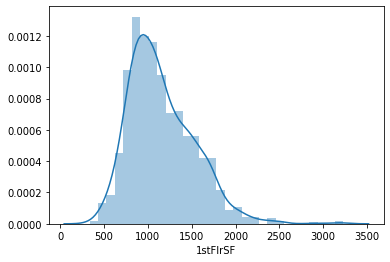

In [17]:
sn.distplot(trainData[:,2:3],hist=True)
plt.xlabel(variables[2])

Text(0.5, 0, 'TotRmsAbvGrd')

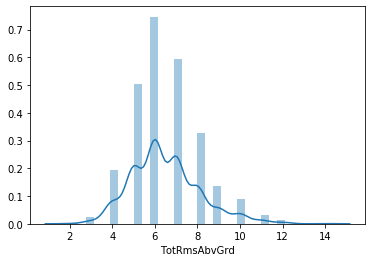

In [18]:
sn.distplot(trainData[:,3:4],hist=True)
plt.xlabel(variables[3])

Text(0.5, 0, 'YearBuilt')

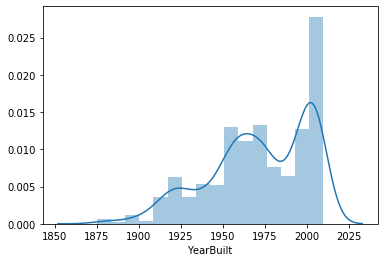

In [19]:
sn.distplot(trainData[:,4:5],hist=True)
plt.xlabel(variables[4])

Text(0.5, 0, 'LotFrontage')

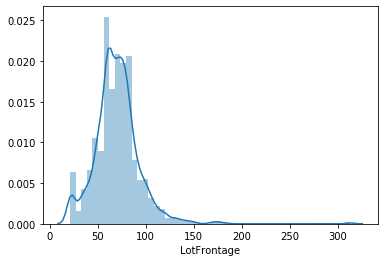

In [20]:
nanarray = trainData[:,5:6]
nanarray = nanarray[np.logical_not(np.isnan(nanarray))]
sn.distplot(nanarray,hist=True)
plt.xlabel(variables[5])

Text(0.5, 0, 'Coeficiente de Correlacion OverallQual : 0.7939900504626405')

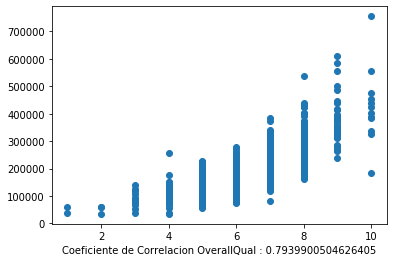

In [21]:
salesPrice = pd.Series(trainData[:,0:1].flatten())
overallQual = pd.Series(trainData[:,1:2].flatten())
correlQual = overallQual.corr(salesPrice)
plot.scatter(overallQual,salesPrice)
plot.xlabel('Coeficiente de Correlacion OverallQual : ' + str(correlQual))

Text(0.5, 0, 'Coeficiente de Correlacion 1stFloorSF : 0.6162887000998717')

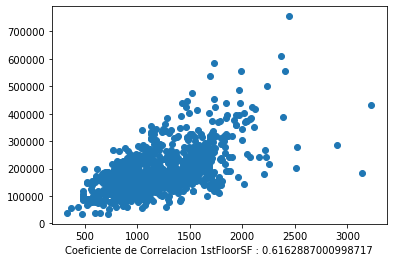

In [22]:
firsFloorSF = pd.Series(trainData[:,2:3].flatten())
correlfirsFloorSF = firsFloorSF.corr(salesPrice)
plot.scatter(firsFloorSF,salesPrice)
plot.xlabel('Coeficiente de Correlacion 1stFloorSF : ' + str(correlfirsFloorSF))

Text(0.5, 0, 'Coeficiente de Correlacion TotRmsAbvGrounf : 0.5647069399593065')

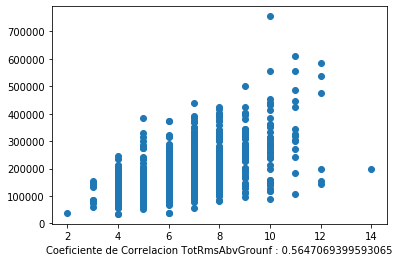

In [23]:
totRms = pd.Series(trainData[:,3:4].flatten())
correltotRms = totRms.corr(salesPrice)
plot.scatter(totRms,salesPrice)
plot.xlabel('Coeficiente de Correlacion TotRmsAbvGrounf : ' + str(correltotRms))

Text(0.5, 0, 'Coeficiente de Correlacion YearBuilt : 0.5341706927117515')

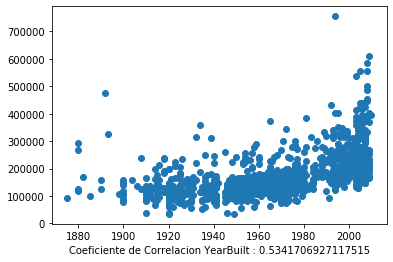

In [24]:
yrBuilt = pd.Series(trainData[:,4:5].flatten())
correlyrBuilt = yrBuilt.corr(salesPrice)
plot.scatter(yrBuilt,salesPrice)
plot.xlabel('Coeficiente de Correlacion YearBuilt : ' + str(correlyrBuilt))

Text(0.5, 0, 'Coeficiente de Correlacion LotSqrFron : 0.363291616653892')

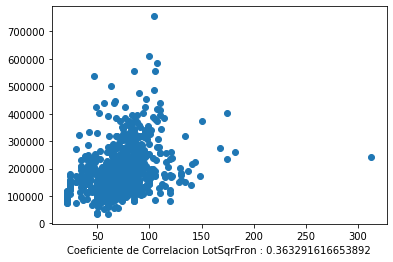

In [25]:
lotFront = pd.Series(trainData[:,5:6].flatten())
correllotFront = lotFront.corr(salesPrice)
plot.scatter(lotFront,salesPrice)
plot.xlabel('Coeficiente de Correlacion LotSqrFron : ' + str(correllotFront))

# Usaremos OveralQual y 1stFloorSF ya que Tienen el mayor indice de Correlacion

In [26]:
# y salesPrice
# x1 overallQual
# x2 firsFloorSF
vectorSalesPrice = salesPrice.values
vectoroverallQual = overallQual.values
vectorfirsFloorSF = firsFloorSF.values
def funcionEntrenamiento(x,y,epochs,imprimir_error_cada,escalar_lr,m):
    arrayOfOnes = [1] * len(x)
    error = []
    params = []
    x1 = np.vstack((x,arrayOfOnes)).T
    # Decidi usar 34900 como b ya que es el minimo del precio de venta y 0.75 como pendiente aproximando la pendiendo del scatter 
    mb = (m,34900)
    for i in range(0,epochs):
        params.append(mb)
        yhat=np.dot(x1,mb)
        err = np.mean( np.square( y - yhat ) , axis = 0) / 2
        error.append(err)
        vectorGradiente = np.mean((yhat-y)[:,None] * x1, axis = 0)
        mb = mb - escalar_lr * vectorGradiente
        if((i+1)%imprimir_error_cada == 0 ):
            print('Iteracion Numero : ' + str(i+1) + ' Error : ' + str(error[i]))
    return params ,error
            



In [27]:
#Para OveralQuall
mAUsar = rangos[0]/rangos[1]
#Converger en un error con un l_r muy pequeno
#funcionEntrenamiento(vectoroverallQual,vectorSalesPrice,900000,100000,0.0009,mAUsar)
# converger en el mismo error con un l_r mas pequeno y menos iteraciones
OverAllModel = funcionEntrenamiento(vectoroverallQual,vectorSalesPrice,1000,500,0.04,mAUsar)
print('Last MB for OverAll = ' + str(OverAllModel[0][-1]))
 

Iteracion Numero : 500 Error : 1202210058.8674848
Iteracion Numero : 1000 Error : 1155222164.487509
Last MB for OverAll = [ 42522.23490373 -77962.79583414]


In [28]:
#Para OveralQuall
mAUsar2 = rangos[0]/rangos[2]
#Converger en un error con un l_r muy pequeno
#funcionEntrenamiento(vectoroverallQual,vectorSalesPrice,900000,100000,0.0009,mAUsar)
# converger en el mismo error con un l_r mas pequeno y menos iteraciones
FloorModel = funcionEntrenamiento(vectorfirsFloorSF,vectorSalesPrice,1000,500,0.000001,mAUsar2)
print('Last MB for 1stFloorSq = ' + str(FloorModel[0][-1]))
#1925447853.9896634

Iteracion Numero : 500 Error : 1925618206.179395
Iteracion Numero : 1000 Error : 1925618112.6598706
Last MB for 1stFloorSq = [  126.36883939 34899.4720516 ]


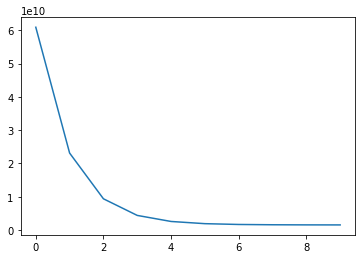

In [29]:
def graficarErrores(errores):
    plot.plot(errores)
graficarErrores(OverAllModel[1][:10])

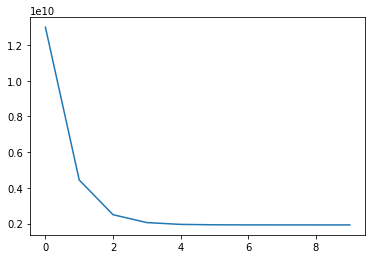

In [30]:

graficarErrores(FloorModel[1][:10])

In [31]:
def mostrarProgreso(base,var,model,qty, limit):
    plot.scatter(var,salesPrice)
    for i in range(0,len(model)):
        if (i%qty==0 and i < limit):
            plot.plot(var,var*model[i][0] + model[i][1])

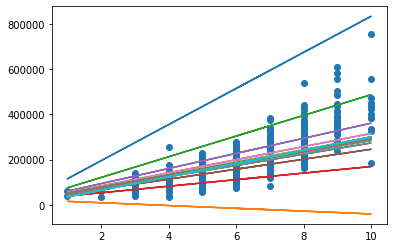

In [32]:
mostrarProgreso(salesPrice,overallQual,OverAllModel[0],1,100)

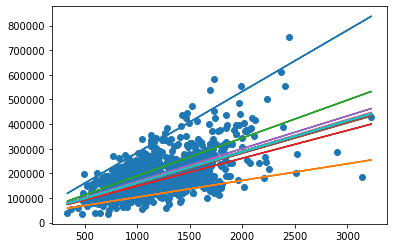

In [33]:
mostrarProgreso(salesPrice,firsFloorSF,FloorModel[0],1,100)

In [34]:
 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [35]:

regressor.fit(vectoroverallQual.reshape(-1,1), vectorSalesPrice.reshape(-1,1))
#To retrieve the intercept:
scmbOverall = ( regressor.coef_[0][0], regressor.intercept_[0] )
#For retrieving the slope:
print(scmbOverall)

regressor.fit(vectorfirsFloorSF.reshape(-1,1), vectorSalesPrice.reshape(-1,1))
#To retrieve the intercept:
scmbFloorSF = ( regressor.coef_[0][0], regressor.intercept_[0] )
#For retrieving the slope:
print(scmbFloorSF)

(45411.998779159156, -96469.57131873982)
(129.95124228715716, 30324.585174963664)


In [60]:
def obtenerValor(mb,mbsc,xs):
    miPred = xs[0]*mb[0] + mb[1]
    scPred = xs[0]*mbsc[0] + mbsc[1]
    prom = (miPred+scPred)/2
    return (miPred,scPred,prom)

In [61]:
print(obtenerValor(OverAllModel[0][-1],scmbOverall,[10]))

(347259.55320313014, 357650.41647285176, 352454.98483799095)


[9955351.421808235, 44129539.86888178]
[43464792.93227177, 43464792.93227177]


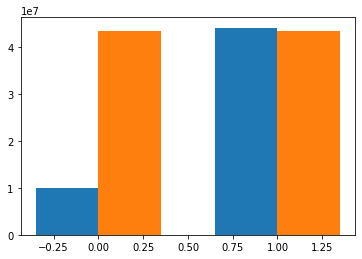

In [75]:
errM1E = 0
errM1S = 0
errM2E = 0
errM2S = 0
for i in range(0,len(valData)):
    valM1E = obtenerValor(OverAllModel[0][-1],scmbOverall,[valData[i][1]])[1]
    valM1S = obtenerValor(OverAllModel[0][-1],scmbOverall,[valData[i][1]])[2]
    valM2E = obtenerValor(FloorModel[0][-1],scmbFloorSF,[valData[i][1]])[1]
    valM2S = obtenerValor(FloorModel[0][-1],scmbFloorSF,[valData[i][1]])[2]
    errM1E = errM1E + abs(valData[i][0] - valM1E)
    errM1S = errM1S + abs(valData[i][0] - valM1S)
    errM2E = errM2E + abs(valData[i][0] - valM2E)
    errM2S = errM2S + abs(valData[i][0] - valM2S)
    #print(valData[i][0], valM1[2], valM2[2])
modelE = [errM1E, errM2E]
modelS = [errM2S, errM2S]
print(modelE)
print(modelS)
width = 0.35  # the width of the bars
labels = ['OverAll', 'SQRFT']
x = np.arange(len(labels)) 
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, modelE, width, label='OverAll')
rects2 = ax.bar(x + width/2, modelS, width, label='SQRFT')